In [ ]:
import numpy as np
import django
import seaborn as sns
import matplotlib.pyplot as plt

import time

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [4]:
from matchmaking.groupmatching.knn import *

In [16]:
from enum import Enum
class Ethnicity(Enum):
    Chinese = 1
    Malay = 2
    Indian = 3
    Others = 4

    @classmethod
    def valueToName(cls, name):
        for i in cls:
            if name == i.name:
                return i.value
        return Ethnicity.Others.value

In [18]:
Ethnicity.valueToName("Chinese")

1

In [10]:

X, y = make_blobs(
   n_samples=200, n_features=5,
   centers=4, cluster_std=0.5,
   shuffle=True, random_state=0
)

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

In [11]:
kMeans(X, 1, 9)


9 2 1
[[197, 192, 199, 195, 189, 198, 193, 188, 196], [185, 177, 194, 184, 171, 191, 183, 165, 190], [181, 161, 187, 180, 160, 186, 178, 152, 182], [176, 143, 179, 174, 141, 175, 172, 140, 173], [169, 134, 170, 167, 133, 168, 162, 131, 166], [156, 130, 164, 151, 129, 163, 149, 128, 159], [146, 127, 158, 145, 119, 157, 139, 117, 155], [132, 114, 154, 126, 112, 153, 125, 111, 150], [121, 110, 148, 115, 92, 147, 113, 81, 144], [104, 72, 142, 101, 70, 138, 99, 62, 137], [87, 61, 136, 85, 60, 135, 84, 58, 124], [79, 56, 123, 76, 54, 122, 75, 43, 120], [71, 40, 118, 67, 37, 116, 66, 36, 109], [59, 29, 108, 55, 27, 107, 50, 25, 106], [49, 19, 105, 32, 18, 103, 20, 15, 102], [17, 11, 100, 12, 10, 98, 6, 9, 97], [5, 7, 96, 1, 4, 95, 94, 93, 91], [90, 89, 88, 86, 83, 82, 80, 78, 77], [74, 73, 69, 68, 65, 64, 63, 57, 53], [52, 51, 48, 47, 46, 45, 44, 42, 41], [39, 38, 35, 34, 33, 31, 30, 28, 26], [24, 23, 22, 21, 16, 14, 13, 8, 3], [2, 0]]
[[160, 139, 169, 195, 189, 53, 68, 92, 8], [185, 5, 194, 

[[160, 139, 169, 195, 189, 53, 68, 92, 8],
 [185, 5, 194, 63, 170, 191, 183, 165, 190],
 [124, 46, 187, 180, 120, 186, 1, 152, 182],
 [176, 143, 151, 174, 141, 175, 172, 140, 173],
 [105, 134, 86, 44, 133, 168, 162, 131, 40],
 [156, 130, 164, 161, 129, 55, 149, 128, 159],
 [146, 127, 158, 145, 119, 93, 45, 117, 155],
 [132, 38, 39, 126, 112, 153, 125, 52, 11],
 [197, 76, 25, 115, 74, 66, 113, 81, 144],
 [104, 33, 142, 101, 70, 138, 99, 62, 137],
 [87, 61, 136, 85, 60, 135, 118, 58, 35],
 [199, 56, 123, 167, 54, 122, 75, 43, 0],
 [67, 166, 84, 171, 37, 116, 147, 36, 109],
 [59, 29, 108, 163, 9, 107, 50, 148, 106],
 [79, 19, 27, 32, 18, 103, 20, 15, 102],
 [17, 89, 100, 12, 10, 98, 6, 179, 97],
 [177, 7, 96, 178, 4, 95, 94, 157, 91],
 [90, 150, 88, 71, 83, 82, 80, 78, 77],
 [73, 188, 69, 193, 65, 64, 184, 57, 198],
 [111, 51, 48, 47, 49, 192, 110, 42, 41],
 [154, 114, 181, 34, 72, 31, 30, 28, 26],
 [24, 23, 22, 21, 16, 14, 13, 196, 3],
 [2, 121]]

In [103]:
#
# data = x[1:,:]
n = 192
min_group = 1
max_groupsize = 9
group_size = -1 # if is -1, then reject some users
rem_size = 0 # will be > 0 if not 0
for i in range(max_groupsize, min_group, -1):
    rem_size = n % i
    print(i, rem_size, min_group)
    if rem_size >= min_group:
        group_size = i
        break
print(group_size)

9 3 1
9


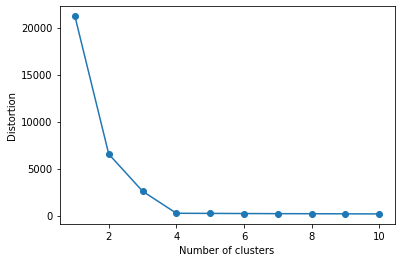

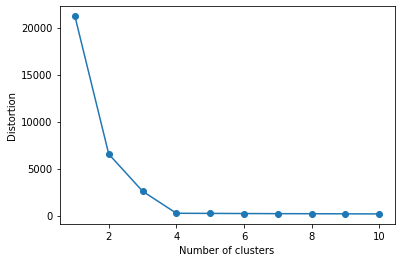

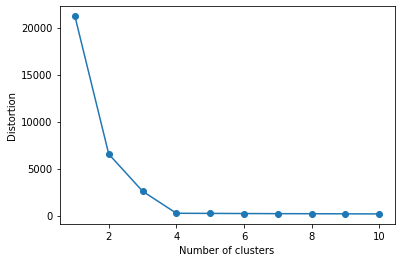

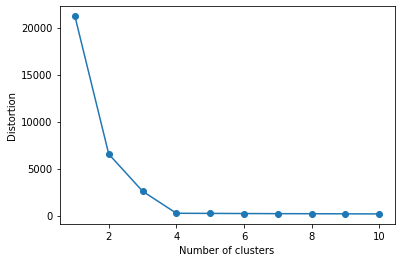

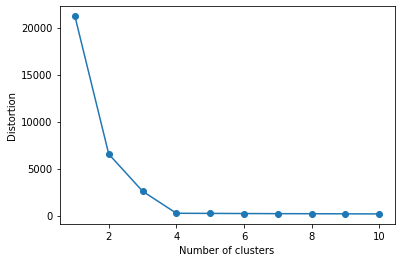

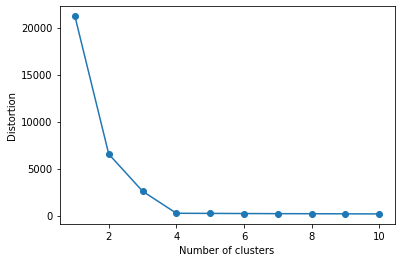

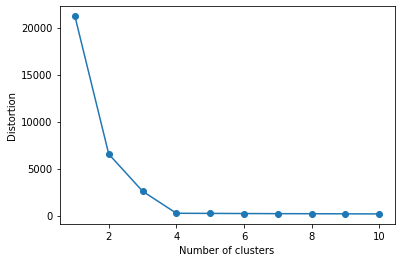

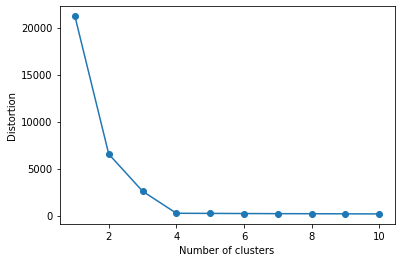

489 ms ± 66.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%%timeit
# st = time.time()
# y_km = km.fit_predict(X)
# print(time.time() - st)
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [28]:
def calc_distance(x1, y1, a, b, c):
    return np.abs((a * x1 + b * y1 + c )) / np.sqrt(a**2 + b ** 2)

In [126]:
dist_point_from_cluster_centre = []
k = list(range(1, 11))
for i in k:
    km = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    dist_point_from_cluster_centre.append(km.inertia_)
a = distortions[0] - distortions[-1]
b = k[-1] - k[0]
c = (k[0] * dist_point_from_cluster_centre[-1]) - (k[8] * dist_point_from_cluster_centre[0])
point_dist = np.argmax(list(map(lambda x, y: calc_distance(x, y, a, b, c), k, dist_point_from_cluster_centre )))
km = KMeans(
        n_clusters=point_dist, init="k-means++",
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
km.fit(X)
res = km.predict(X)

# # plot
# plt.plot(range(1, 11), distortions, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Distortion')
# plt.show()

In [120]:
from itertools import cycle
def distribute_groups(res, group_size, rem_size):
    diction = {}
    for i in range(len(set(res))):
        diction[i] = list(np.argwhere(res == i).T.flatten())
    clockiterator = cycle(set(res))
    iterations = 0
    groups = []
    numGroups = n // group_size + (1 if rem_size > 0 else 0)
    while len(groups) < numGroups:
        nextGroup = []
        currGroup = 0
        while currGroup < group_size and iterations < n:
            myClass = clockiterator.__next__()
            if len(diction[myClass]) == 0:
                continue
            nextGroup.append(diction[myClass].pop())
            iterations += 1
            currGroup += 1
            # print(iterations, currGroup)
        groups.append(nextGroup)
    return groups
groups = distribute_groups(res, group_size, rem_size)

3

In [80]:

l1 = [1, 2, 3,21, 2,65]
l2 = [9, 6, 2,5,2,43]

In [141]:
def random_swap(list: list,m :int , n:int):
    a, b =np.random.randint(0, min(len(list[m]), len(list[n])), 2)
    temp = list[m][a]
    # print(m, n, temp, list[n][b])
    list[m][a] = list[n][b]
    list[n][b] = temp
    return



In [142]:
n = np.random.randint(0, len(groups) // 2)
m = np.random.randint(len(groups) // 2, len(groups))
n, m

(6, 17)

In [143]:
def random_swaps(groups):
    numSwaps = len(groups) * 2
    swaps = 0
    while swaps < numSwaps:
        n = np.random.randint(0, len(groups) // 2)
        m = np.random.randint(len(groups) // 2, len(groups))
        random_swap(groups, m, n)
        swaps += 1


In [144]:
print(groups[0], groups[-1])
random_swaps(groups)
print(groups[0], groups[-1])


[23, 54, 31, 56, 189, 173, 192, 1, 196] [186, 170, 143]
[155, 195, 31, 56, 120, 33, 102, 50, 196] [24, 80, 184]
